In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect('../data/test_db2.db')

In [3]:
df = pd.read_sql('SELECT * FROM results', con)

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   trial_id   160 non-null    int64  
 1   batch      160 non-null    int64  
 2   train_acc  160 non-null    float64
 3   val_acc    160 non-null    float64
 4   test_acc   160 non-null    float64
 5   epochs     160 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.6 KB


,trial_id,batch,train_acc,val_acc,test_acc,epochs
0,1,1,0.680,0.1930,0.1983,5
1,1,2,0.696,0.2226,0.2156,4
2,1,3,0.712,0.2574,0.2536,4
3,1,4,0.782,0.2756,0.2753,4
4,1,5,0.717,0.2813,0.2816,4


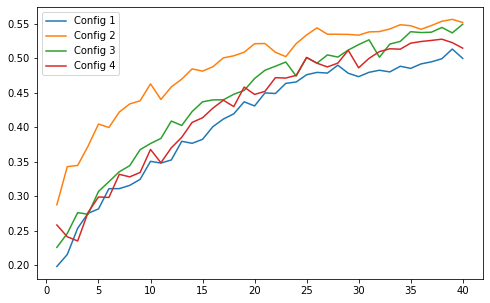

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
for group in df.groupby('trial_id'):
    ax.plot(group[1]['batch'], group[1]['test_acc'],
           label=f'Config {group[0]}')
ax.legend();